In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path_dataset="/work/bb1036/b381362/dataset" 
path_out="/home/b/b381362/output"   

# path_ICON = path_dataset + "/data_rttov_T12_dropupbottom_Reff.nc"
rttov_path_refl_emmis = path_out+ "/output-rttov/rttov-131-data-icon-1to19-26-T12.nc"
rttov_path_rad = path_out + "/output-rttov/rttov-13-data-icon-1-to-36-not-flip.nc"

In [4]:
rttov_path = "/work/bb1036/rttov_share/rttov-131-36-channels-05022013-07182022.nc"

In [5]:
rttov_ds_rad = xr.open_dataset(rttov_path_rad).compute()  # write read rttov in a function
rttov_ds_refl_emmi = xr.open_dataset(rttov_path_refl_emmis).compute()    
rttov_ds = xr.open_dataset(rttov_path).compute()   

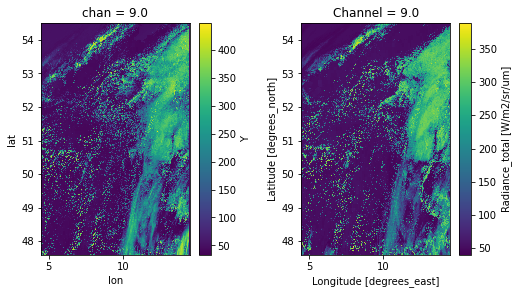

In [119]:
f, axes = plt.subplots(1,2,figsize=(4*2, 1*4*1.066)) #width of 15 inches and 7 inches in height.
f.subplots_adjust(wspace=0.4, hspace=0.4)

axli = axes.ravel()

i = 8
rttov_ds_rad['Y'][i,9:,:].plot(ax = axli[0] )#, vmin=0, vmax=0.12, cmap='jet')
rttov_ds['Radiance_total'][i].plot(ax = axli[1])#, vmin=0, vmax=0.12, cmap='jet')# cmap='cividis', 

# rttov_ds_refl_emmi['bt_refl_total'][i,9:,:].plot(ax = axli[0], vmin=0, vmax=1)
# rttov_ds['BRF_total'][i].plot(ax = axli[1], vmin=0, vmax=1)# cmap='cividis', 


In [51]:
a = rttov_ds['BRF_total'][i]
print('min, max, mean', a.values.min(), a.values.max(), a.values.mean())

min, max, mean 0.018278724 0.33728084 0.20263469


In [50]:
b = rttov_ds_rad['Y'][i,9:,:]
print('min, max, mean', b.values.min(), b.values.max(), b.values.mean())

min, max, mean 0.0437271 0.8134649 0.46095616


In [43]:
b = rttov_ds_refl_emmi['bt_refl_total'][i,9:,:]
print('min, max, mean', b.values.min(), b.values.max(), b.values.mean())

min, max, mean 0.0220046 1.0307385 0.44933644


In [52]:
c = a.values - b.values
print('min, max, mean', c.min(), c.max(), c.mean())

min, max, mean -0.6282233 0.19837739 -0.2583214


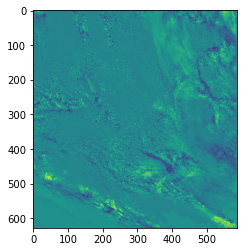

In [46]:
plt.imshow(((rttov_ds_refl_emmi['bt_refl_total'][i,9:,:]).values - rttov_ds['BRF_total'][i].values))

In [54]:
rttov_variable_OPAC = np.zeros((np.shape(rttov_ds['BRF_total'].values)))

rttov_variable_OPAC[:19] = rttov_ds['BRF_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
rttov_variable_OPAC[19:25] = rttov_ds['Radiance_total'][19:25]
rttov_variable_OPAC[25] = rttov_ds['BRF_total'][25] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
rttov_variable_OPAC[26:36] = rttov_ds['Radiance_total'][26:36]

In [66]:
rttov_variable = np.zeros((np.shape(rttov_ds['BRF_total'].values)))
rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19,9:,] #refl 1-19, 26 rad 20-25 and 27-36
rttov_variable[19:25] = rttov_ds_rad['Y'][19:25,9:,]
rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][19,9:,] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
rttov_variable[26:36] = rttov_ds_rad['Y'][26:36,9:,]


In [74]:
import pandas as pd
X_flated = rttov_variable_OPAC.transpose(1, 2,0).reshape(-1,rttov_variable_OPAC.transpose(1, 2,0).shape[2]) # #np.stack(X_list, axis=-1)
print(np.shape(X_flated))
df_rttov_variable_OPAC=pd.DataFrame(X_flated) 
df_rttov_variable_OPAC.columns = [f"{i}" for i in range(rttov_variable.shape[0])]

X_flated = rttov_variable.transpose(1, 2,0).reshape(-1,rttov_variable.transpose(1, 2,0).shape[2]) # #np.stack(X_list, axis=-1)
print(np.shape(X_flated))
df_rttov_variable=pd.DataFrame(X_flated) 
df_rttov_variable.columns = [f"{i}" for i in range(rttov_variable.shape[0])]

(369892, 36)
(369892, 36)


In [75]:
df_rttov_variable_OPAC.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.075968,0.470293,0.103331,0.116875,0.385096,0.212483,0.081742,0.122050,0.110877,0.096970,...,1.060143,2.347874,7.187494,4.808622,7.906312,7.425516,4.726706,3.705254,3.117728,2.332834
1,0.075944,0.470410,0.103215,0.116832,0.385223,0.212511,0.081821,0.121887,0.110742,0.096869,...,1.062717,2.352675,7.136134,4.781898,7.859541,7.386826,4.717285,3.701696,3.115533,2.332056
2,0.075930,0.470136,0.103268,0.116847,0.385012,0.212468,0.081659,0.121962,0.110802,0.096915,...,1.046713,2.319582,7.145285,4.790615,7.868732,7.386450,4.705329,3.694556,3.111313,2.329554
3,0.075973,0.470072,0.103424,0.116907,0.384909,0.212445,0.081614,0.122182,0.110985,0.097050,...,1.059850,2.332461,7.173922,4.804498,7.894258,7.408622,4.712290,3.697814,3.113268,2.330491
4,0.075961,0.470197,0.103333,0.116875,0.385020,0.212467,0.081672,0.122053,0.110880,0.096972,...,1.073605,2.370780,7.255756,4.842792,7.965092,7.470776,4.735879,3.708756,3.118894,2.331093


In [76]:
df_rttov_variable.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.059332,0.396899,0.076343,0.090668,0.326667,0.174111,0.067623,0.090107,0.082040,0.071822,...,1.231835,2.611884,7.373108,5.081609,8.035026,7.547256,4.887306,3.856278,3.230950,2.382105
1,0.059292,0.396745,0.076254,0.090632,0.326586,0.174095,0.067522,0.089979,0.081935,0.071745,...,1.229644,2.605694,7.380816,5.088775,8.039311,7.544522,4.881190,3.854528,3.230433,2.382415
2,0.059291,0.396613,0.076290,0.090644,0.326475,0.174072,0.067433,0.090031,0.081977,0.071776,...,1.240044,2.614200,7.278270,5.034613,7.945300,7.464652,4.859797,3.846624,3.226307,2.382555
3,0.059312,0.396457,0.076408,0.090686,0.326317,0.174038,0.067334,0.090201,0.082116,0.071877,...,1.258941,2.632504,7.209677,4.997473,7.881471,7.411654,4.848351,3.843096,3.224288,2.382519
4,0.059296,0.396492,0.076340,0.090661,0.326367,0.174049,0.067356,0.090104,0.082036,0.071819,...,1.274298,2.640409,7.194626,4.989034,7.867069,7.399302,4.845360,3.842524,3.224029,2.382577


In [77]:
df_rttov_variable_OPAC.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,...,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000
mean,0.263083,0.493002,0.249261,0.267687,0.450051,0.315928,0.192828,0.237910,0.245162,0.252129,...,1.145039,2.348613,5.958423,4.186805,6.690482,6.365339,4.338374,3.510042,3.001244,2.305557
std,0.261344,0.221036,0.209143,0.230225,0.215841,0.208334,0.155317,0.165301,0.192107,0.221868,...,0.152439,0.389758,1.508245,0.794465,1.507704,1.321883,0.565832,0.320687,0.199600,0.053270
min,0.035435,0.025961,0.081924,0.060021,0.016612,0.013512,0.005194,0.090129,0.086276,0.075679,...,0.422331,0.603166,1.018183,1.410097,1.644078,1.776951,1.855227,1.869498,1.879552,1.900704
25%,0.077671,0.391451,0.102148,0.108536,0.350845,0.201612,0.091205,0.123764,0.111251,0.095625,...,1.056415,2.239453,5.184503,3.822241,6.005127,5.794278,4.197470,3.463391,2.981045,2.304251
50%,0.101216,0.444626,0.111660,0.125589,0.381568,0.232477,0.114970,0.130860,0.118829,0.106546,...,1.172934,2.488423,6.164995,4.315933,6.938914,6.592079,4.518447,3.637211,3.082868,2.323843
75%,0.428570,0.598264,0.386302,0.411031,0.556603,0.407744,0.289089,0.349778,0.372721,0.396024,...,1.257248,2.601506,7.234564,4.844267,7.951478,7.460834,4.730813,3.705126,3.116489,2.334415
max,0.964338,1.041801,0.872501,0.910835,0.920470,0.749351,0.520727,0.779452,0.838076,0.895692,...,1.443074,2.921050,8.727314,5.641475,9.315025,8.559787,5.030950,3.848166,3.193463,2.353092


In [78]:
df_rttov_variable.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,...,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000
mean,0.263548,0.449336,0.244359,0.264029,0.403567,0.268879,0.152063,0.227973,0.238402,0.248882,...,1.237244,2.498726,5.985974,4.351410,6.714878,6.391334,4.462237,3.644663,3.108427,2.355093
std,0.247463,0.206011,0.206164,0.222616,0.188903,0.159868,0.096937,0.169164,0.191896,0.216617,...,0.149254,0.367930,1.422095,0.779697,1.389781,1.218272,0.528527,0.305188,0.189911,0.049109
min,0.024432,0.022005,0.061488,0.044585,0.010976,0.010548,0.004471,0.069784,0.066702,0.055330,...,0.469062,0.670931,1.131203,1.489285,1.769651,1.902876,1.955443,1.953101,1.946553,1.939020
25%,0.064499,0.331770,0.078608,0.087563,0.295995,0.167853,0.078178,0.093048,0.084479,0.074494,...,1.170007,2.412128,5.163401,3.929756,5.993587,5.787291,4.323222,3.599114,3.089543,2.355853
50%,0.116619,0.388555,0.117680,0.129492,0.333699,0.195819,0.105169,0.121299,0.119323,0.116978,...,1.257348,2.619082,6.001427,4.393473,6.798523,6.486321,4.587906,3.740152,3.170914,2.372019
75%,0.467394,0.589534,0.416068,0.445810,0.533772,0.379552,0.244467,0.369064,0.398623,0.428881,...,1.345521,2.734753,7.290349,5.048810,7.961809,7.479034,4.863590,3.842197,3.222965,2.379312
max,0.970064,1.030738,0.880152,0.915947,0.885531,0.676670,0.437006,0.794244,0.848734,0.901255,...,1.520578,3.031286,8.897282,5.874233,9.363666,8.654025,5.227445,4.027227,3.327690,2.395352


In [ ]:
rttov_variable = np.zeros((np.shape(rttov_ds_rad['Y'].values)))

 


rttov_variable = np.zeros((np.shape(rttov_ds['Radiance_total'].values)))

# print("****************variables shape ", np.shape(rttov_ds_refl_emmi['bt_refl_total'].values), np.shape(rttov_variable), np.shape(rttov_ds_rad['Y'].values))


# rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
# rttov_variable[19:25] = rttov_ds_rad['Y'][19:25]
# rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][19] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
# rttov_variable[26:36] = rttov_ds_rad['Y'][26:36]

rttov_variable[:19] = rttov_ds['BRF_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
rttov_variable[19:25] = rttov_ds['Radiance_total'][19:25]
rttov_variable[25] = rttov_ds['BRF_total'][25] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
rttov_variable[26:36] = rttov_ds['Radiance_total'][26:36]



print("===================================== Training output ====================================== ")

print("****************variables shape training_output", np.shape(rttov_variable))

# rttov_ds_rad.close()
# rttov_ds_refl_emmi.close()
rttov_ds.close()

#rttov_bands =rttov_ds_rad['chan'].values
# print('rttov_variable',np.shape(rttov_variable))

#output then I dont neet to cut   !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# rttov_variable_ds = xr.DataArray( rttov_variable[:,9:,], dims=['chan','lat','lon'], coords= [rttov_ds.chan.data, rttov_ds_refl_emmi.lat.data[9:], rttov_ds_refl_emmi.lon.data ])
rttov_variable_ds = xr.DataArray( rttov_variable, dims=['channel','lat','lon'], coords= [rttov_ds.Channel.data, rttov_ds.Latitude.data, rttov_ds.Longitude.data])   

In [ ]:
    for i in range(len(column)):
        count_nan = df[i].isnull().sum()
        print ('In band {} values NaN: {}'.format(column[i], count_nan))  
